# Table of Contents
 <p><div class="lev1 toc-item"><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></div><div class="lev2 toc-item"><a href="#Standard" data-toc-modified-id="Standard-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Standard</a></div><div class="lev2 toc-item"><a href="#Custom" data-toc-modified-id="Custom-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Custom</a></div><div class="lev3 toc-item"><a href="#Reload" data-toc-modified-id="Reload-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Reload</a></div><div class="lev1 toc-item"><a href="#SETUP" data-toc-modified-id="SETUP-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SETUP</a></div><div class="lev2 toc-item"><a href="#Data-Files" data-toc-modified-id="Data-Files-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Files</a></div><div class="lev2 toc-item"><a href="#Values" data-toc-modified-id="Values-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Values</a></div><div class="lev3 toc-item"><a href="#DDM" data-toc-modified-id="DDM-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>DDM</a></div><div class="lev3 toc-item"><a href="#aDDM" data-toc-modified-id="aDDM-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>aDDM</a></div><div class="lev2 toc-item"><a href="#Parameters" data-toc-modified-id="Parameters-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Parameters</a></div><div class="lev2 toc-item"><a href="#Variables" data-toc-modified-id="Variables-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Variables</a></div><div class="lev1 toc-item"><a href="#RUN" data-toc-modified-id="RUN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RUN</a></div><div class="lev1 toc-item"><a href="#FIT" data-toc-modified-id="FIT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>FIT</a></div><div class="lev2 toc-item"><a href="#Create-Choice-Distributions" data-toc-modified-id="Create-Choice-Distributions-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create Choice Distributions</a></div><div class="lev2 toc-item"><a href="#Parameter-Recovery" data-toc-modified-id="Parameter-Recovery-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Parameter Recovery</a></div><div class="lev3 toc-item"><a href="#Simulate-Participants" data-toc-modified-id="Simulate-Participants-421"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Simulate Participants</a></div><div class="lev3 toc-item"><a href="#Import-RT-Distribution-and-Simulated-Subjects" data-toc-modified-id="Import-RT-Distribution-and-Simulated-Subjects-422"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Import RT Distribution and Simulated Subjects</a></div><div class="lev3 toc-item"><a href="#Calculate-Fit-(MLE)" data-toc-modified-id="Calculate-Fit-(MLE)-423"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Calculate Fit (MLE)</a></div><div class="lev2 toc-item"><a href="#Fit-Group" data-toc-modified-id="Fit-Group-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fit Group</a></div><div class="lev2 toc-item"><a href="#Test-Fit" data-toc-modified-id="Test-Fit-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Test Fit</a></div><div class="lev3 toc-item"><a href="#CONVERT-TO-SHELVE" data-toc-modified-id="CONVERT-TO-SHELVE-441"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>CONVERT TO SHELVE</a></div><div class="lev3 toc-item"><a href="#OLD-FIT-TECHNIQUE" data-toc-modified-id="OLD-FIT-TECHNIQUE-442"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>OLD FIT TECHNIQUE</a></div><div class="lev1 toc-item"><a href="#PLOT" data-toc-modified-id="PLOT-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PLOT</a></div>

# IMPORTS

## Standard

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os                                 # for os independent functions
import seaborn as sns                     # for kernal density estimation
import datetime as dt                     # for naming files
from scipy.special import expit           # for logistic function
from scipy.stats import binned_statistic  # for binning RT vals
from scipy import stats
import sys
from typing import List                   # for writing function defs
import importlib                          # in order to reload edited modules
import itertools                          # for creating values list (for aDDM of all stimuli value combos)
import time
import shelve
import pickle
from tqdm import tqdm                     # for keeping track of progress
import pdb                                # for debugging use: pdb.set_trace()
import copy                               # to do deep copies

# display matplotlib graphs 
%matplotlib inline   
# %precision %.8f check on this...

print(sys.version)

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


## Custom

In [2]:
# Add path where custom modules are saved
sys.path.append('/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/functions')
import utils_addm                         # for importing custom module

### Reload
---
For refreshing the custom module without restarting the kernel

In [3]:
# for reloading edited modules
importlib.reload(utils_addm)

<module 'utils_addm' from '/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/functions/utils_addm.py'>

# SETUP

## Data Files
---
Point to where your data is saved

In [ ]:
expdata_file_name = "data/made_v2/expdata.csv"
fixations_file_name = "data/made_v2/fixations.csv"

**How many simulations for each VALUE?**

In [ ]:
# 1000 is okay but more is better
sims_per_val = 1000

## Values
----
List of experiment **values**

### aDDM

In [ ]:
# Get left and right values from data
values_array_addm = utils_addm.values_for_simulation_addm(expdata_file_name, sims_per_val)

## Parameters
----
Define parameter **search space**

---
*Note that* ```parameter_values()``` *will save a copy of all parameter values to* `/outputs`

In [ ]:
# SCALING VALUE FOR DRIFT
drift_weight = np.linspace(0.01,0.3, 8)

# BOUNDARY VALUE
upper_boundary = np.linspace(0.05,0.45, 8)

# THETA VALUE
theta = np.linspace(0.1,1,5)

In [ ]:
parameter_combos = utils_addm.parameter_values(drift_weight, upper_boundary, theta)

----
Calculate **total number of simulations**

In [ ]:
utils_addm.total_sim_count(parameter_combos, values_array_addm)

## Variables
---
**Set** variable values 

In [ ]:
startVar = 0
nonDec = 0.8        # change to add time based on each fixation
                    # calculate based on difference between exp 1 & 2 RTS.
nonDecVar = 0
driftVar = 0
maxRT = 10
precision = 0.001   # ms precision
s = 0.1             # scaling factor (Ratcliff) (check if variance or SD)
num_sims = len(values_array_addm)

---
**Create** array with *first* and *mid* fixations (pulled from subject data)

In [ ]:
# array with first and middle fixation distributions
dwell_array = utils_addm.create_dwell_array(num_sims, fixations_file_name) 

# RUN

In [ ]:
init_time=time.time()

for x in tqdm(range(len(parameter_combos))):
    loop_num = x

    dfOut = utils_addm.simul_addm(parameter_combos, values_array_addm, dwell_array, num_sims, loop_num, init_time,
                     startVar, nonDec, nonDecVar, driftVar, maxRT, precision, s)

    utils_addm.save_sim_combo_csv(dfOut, loop_num) 
# is it better practice to save to Shelve?

# FIT

## Create Choice Distributions

**Define Paths**
- Input path (location of CSV simulation files)
- Output path (where pickled file will be saved)

In [ ]:
path_to_csv = "/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/outputs/2017-11-16/" 
path_to_save = path_to_csv + "/pickle/"     

**Combine All Simulations**
- Creates a single file out of all the individual CSV files
- Saves to a pickle file

In [275]:
utils_addm.combine_sims(path_to_csv, path_to_save)

100%|██████████| 320/320 [00:58<00:00,  5.49it/s]


**Create RT/Choice Distributions**
- Use simulations to create binned rt/choice distributions for all parameter combinations 
- Saves distribtions to pickle file

In [90]:
utils_addm.rtDistFunc(nonDec, values_array_addm, path_to_save)
# nonDec: from Variables, indicates where the first bin will begin
# values_array_addm: from Values, indicates all of the value combinations for which sims were run

100%|██████████| 320/320 [01:38<00:00,  3.26it/s]


## Parameter Recovery Test

- Simulate participants: run a total of 300(ish) trials for each with a given set of parameters (similar number of trials to behavioral experiment)
- Sample each value combo 4X (=320 trials)
- Simulate these values w/addm sim

### Simulate Subjects

**Create values array**

In [16]:
# Create 4 of each value
sims_per_val = 4
values_array_addm_sim_subj = utils_addm.values_for_simulation_addm(expdata_file_name, sims_per_val)
num_sims = len(values_array_addm_sim_subj)

You will run 4 simulations for each of 81 value combinations for a total of 324 simulations.


/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/functions/utils_addm.py:69: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df = pd.DataFrame.from_csv(expdata_file_name, header=0, sep=",", index_col=None)


**Create dwell array**

In [17]:
# Matching Dwell Array (based on 4 sims per value)
# array with first and middle fixation distributions
dwell_array = utils_addm.create_dwell_array(num_sims, fixations_file_name) 

/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/functions/utils_addm.py:210: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df = pd.DataFrame.from_csv(fixations_file_name, header=0, sep=",", index_col=None)


**Create simulations**

In [ ]:
for x in tqdm(range(len(parameter_combos))):
    loop_num = x

    dfOut = utils_addm.simul_addm(parameter_combos, values_array_addm_sim_subj, dwell_array, num_sims, loop_num,
                     startVar, nonDec, nonDecVar, driftVar, maxRT, respOptions, precision, s)

    # Save to CSV and/or Shelve
    utils_addm.save_sim_subjects_csv(dfOut, loop_num) 

**Combine subject simulations into single dict**

In [101]:
path_to_csv = "/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/outputs/2017-11-26/sim_subj/" 
path_to_save = path_to_csv + "/pickle/"

In [102]:
utils_addm.combine_sims(path_to_csv, path_to_save)

100%|██████████| 320/320 [00:01<00:00, 308.91it/s]


### Import RT Distribution and Simulated Subjects

**Import RT Distributions**

Careful with `path_to_file`. Make sure pointing to correct directory.

In [38]:
path_to_file = "/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/outputs/2017-11-16/pickle/rt_dist.pickle"

rt_dist = utils_addm.pickle_read(path_to_file)

**Import Simulated Subjects**

In [11]:
path_to_file = "/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/outputs/2017-11-20/sim_subj/pickle/sims_dict.pickle"

sim_subjects = utils_addm.pickle_read(path_to_file)

### Calculate Fit (MLE)

In [10]:
path_to_save = "/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/outputs/2017-11-26/sim_subject/"

In [35]:
utils_addm.fit_sim_subjects(sim_subjects, rt_dist, nonDec, path_to_save)

100%|██████████| 320/320 [48:58<00:00,  9.18s/it]


Saved to /Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/outputs/2017-11-26/subject/subj_MLE.pickle.


### Sort Fits

In [5]:
path_to_file = "outputs/2017-11-26/subject/subj_MLE.pickle"
sim_subj_mle = utils_addm.pickle_read(path_to_file)

path_to_save = "outputs/2017-11-26/subject/"

utils_addm.sort_sim_subject_fit(sim_subj_mle, sim_subjects, path_to_save)

NameError: name 'sim_subjects' is not defined

### Examine Fits
----
Can we recover parameters?

In [4]:
path_to_file = "outputs/2017-11-26/subject/summed_sim_subj_MLE.pickle"

summed_sim_subj_mle = utils_addm.pickle_read(path_to_file)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/2017-11-26/subject/summed_sim_subj_MLE.pickle'

**Look at fit for individual subjects**

---
Better way to check overall fit with some statistical rigor??

In [ ]:
summed_sim_subj_mle['0.134_0.279_0.1'].head(10)

## Separate Train/Test Data

Import and reformat original data

In [58]:
# Data from subjects
expdata = pd.read_csv("data/made_v2/expdata.csv")
fixations = pd.read_csv("data/made_v2/fixations.csv")

# Convert RTs to seconds
expdata.rt = expdata.rt/1000
# Create summed val column
expdata['summed_val'] = expdata.item_left_val + expdata.item_right_val

# Rename columns to match sim data column names
expdata = expdata.rename(columns = {
    'choice':'resp',
    'item_left':'act_face_val',
    'item_right':'act_house_val',
    'item_left_val':'val_face',
    'item_right_val':'val_house',
})

Create dictionaries for both Group and Individual Subjects

In [59]:
# train on even trials
train_expdata = expdata[expdata.trial % 2 == 0]
train_fixations = fixations[fixations.trial % 2 == 0]

# Reset Indices
train_expdata.reset_index(drop=True, inplace=True)
train_fixations.reset_index(drop=True, inplace=True)

# test on odd trials
test_expdata = expdata[expdata.trial % 2 == 1]
test_fixations = fixations[fixations.trial % 2 == 1]

# Reset Indices
test_expdata.reset_index(drop=True, inplace=True)
test_fixations.reset_index(drop=True, inplace=True)

#-------#
# GROUP #
#-------#

# make dictionary for fitting purposes (essentially "1' subject)
group_train = {}                  
group_train[0] = train_expdata

#-------------#
# INDIVIDUALS #
#-------------#

# make dictionary for fitting purposes (all subjects)
individual_train = {}

# get unique subjects as list
subjects = np.unique(train_expdata.parcode)

# create dict for each subjects training data
i = 0
for subject in subjects:
    individual_train[i] = train_expdata[train_expdata.parcode == subject]
    i = i + 1

## Fit Train Data
---
Find MLE for each of the simulated parameter combinations

### GROUP

In [ ]:
path_to_save = 'outputs/2017-11-30/train/train_group_'

# note that we are effectively fitting a 'single subject' here (group level)
utils_addm.fit_subjects(group_train, rt_dist, nonDec, path_to_save)

### INDIVIDUAL

In [61]:
path_to_save = 'outputs/2017-11-30/train/train_individual_'

# fit all subjects (individual level)
utils_addm.fit_subjects(individual_train, rt_dist, nonDec, path_to_save)


  0%|          | 0/23 [00:00<?, ?it/s]/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/functions/utils_addm.py:741: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  subject_dict[subject][key] = rt_distList                            # Create column from list
100%|██████████| 23/23 [02:56<00:00,  7.66s/it]

Saved to outputs/2017-11-30/train/train_individual_MLE.pickle.


## Find Best Fit

### GROUP

**Sort Fits:** Best to Worst

In [15]:
# Load the full fits
path_to_file = "outputs/2017-11-30/train/train_group_MLE.pickle"
group_mle = utils_addm.pickle_read(path_to_file)

# Save the sorted fits to a new file
path_to_save = "outputs/2017-11-30/train/train_group_"
utils_addm.sort_subject_fit(group_mle, path_to_save)

# Load Sorted Fits
path_to_file = "outputs/2017-11-30/train/train_group_summed_MLE.pickle"
group_mle_sorted = utils_addm.pickle_read(path_to_file)

group_mle_sorted[0].head()

100%|██████████| 1/1 [00:00<00:00, 52.50it/s]

Saved to outputs/2017-11-26/subject/summed_subj_MLE.pickle.


**Match to Sims:** Find the simulations for the best fit parameters

In [276]:
# load the sims dict
path_to_file = "outputs/2017-11-16/pickle/sims_dict.pickle"
sims_dict = utils_addm.pickle_read(path_to_file)

# Which dict key for the best param combo
for param_combo in sims_dict:
    if (round(sims_dict[param_combo].scaling[0],3) == 0.051)\
    & (round(sims_dict[param_combo].upper_boundary[0] ,3) == 0.164)\
    & (round(sims_dict[param_combo].theta[0] ,3) == 0.325):
        best_group_fit = param_combo
        print(best_group_fit)

267


### INDIVIDUAL

SORT FITS

In [62]:
# Load the full fits
path_to_file = "outputs/2017-11-30/train/train_individual_MLE.pickle"
subj_mle = utils_addm.pickle_read(path_to_file)

# Sort Fits. Save to a new file
path_to_save = "outputs/2017-11-30/train/train_individual_"
utils_addm.sort_subject_fit(subj_mle, path_to_save)

100%|██████████| 23/23 [00:00<00:00, 93.82it/s] 

Saved to outputs/2017-11-30/train/train_individual_summed_MLE.pickle.


DF OF BEST FIT PARAMETERS FOR EACH SUBJECT

In [7]:
# Load Sorted Fits
path_to_file = "outputs/2017-11-30/train/train_individual_summed_MLE.pickle"
subj_mle_sorted = utils_addm.pickle_read(path_to_file)

# Best fit params & sims_dict KEY
best_params_list = []

for subject in subj_mle_sorted:
    best_params_list.append(subj_mle_sorted[subject].iloc[0,:])

subj_params_df = pd.DataFrame(best_params_list)            # make DF of best parameters for each subject
subj_params_df.rename(columns={0: 'MLE'}, inplace=True)    # rename first column to MLE
subj_params_df = subj_params_df.reset_index(drop=True)     # make index values sequential

ADD MATCHING SIMULATION KEY FOR EACH SUBJECT

In [8]:
# list to hold key values for matching sims
matching_sims = []

# load the sims dict (this is slow...necessary?)
path_to_file = "outputs/2017-11-16/pickle/sims_dict.pickle"
sims_dict = utils_addm.pickle_read(path_to_file)

for subject in subj_params_df.index:
    scaling, boundary, theta = subj_params_df.loc[subject,'scaling':'theta']
    for param_combo in sims_dict:
        if (round(sims_dict[param_combo].scaling[0],3) == scaling)\
        & (round(sims_dict[param_combo].upper_boundary[0] ,3) == boundary)\
        & (round(sims_dict[param_combo].theta[0] ,3) == theta):
            matching_sims.append(param_combo)

subj_params_df['sims_key'] = matching_sims
subj_params_df.head()

,MLE,scaling,boundary,theta,sims_key
0,685.762045,0.093,0.221,0.325,316
1,642.259050,0.010,0.221,0.325,68
2,584.865968,0.051,0.107,1.000,264
3,666.910602,0.093,0.164,0.550,312
4,659.512296,0.093,0.221,0.100,315


# Sim with Test Data

LOAD EXPERIMENTAL DATA AND FIXATION DATA

In [9]:
expdata = pd.read_csv("data/made_v2/expdata.csv")
fixations = pd.read_csv("data/made_v2/fixations.csv")

CONFIGURE EXPERIMENTAL DATA DF

In [10]:
# Convert RTs to seconds (necessary here?)
expdata.rt = expdata.rt/1000
# Create summed val column
expdata['summed_val'] = expdata.item_left_val + expdata.item_right_val

# Rename columns to match sim data column names
expdata = expdata.rename(columns = {
    'choice':'resp',
    'item_left':'act_face_val',
    'item_right':'act_house_val',
    'item_left_val':'val_face',
    'item_right_val':'val_house',
})

# Add first fixation stimuli (house/face)
first_fix = fixations.fix_item[fixations.fix_num == 1]
expdata['first_fix'] = first_fix.values - 1 # subtract one so can easily convert to boolean

# Add best fit estimated values for each subject
expdata['subject'] = 0       # initialize subject column (counts consecutively)
i = 0
for subject in np.unique(expdata.parcode):
    expdata['subject'][expdata.parcode == subject] = i
    i+=1

expdata['est_scaling'] = 0      # init parameter columns
expdata['est_boundary'] = 0
expdata['est_theta'] = 0

for i in range(len(subj_params_df)):     # add parameters (subj_params = best fit of each subject)
    expdata['est_scaling'][expdata.loc[:,'subject'] == i] = subj_params_df.scaling[i]    
    expdata['est_boundary'][expdata.loc[:,'subject'] == i] = subj_params_df.boundary[i]
    expdata['est_theta'][expdata.loc[:,'subject'] == i] = subj_params_df.theta[i]

#----------------
# Throwing lots of warnings: A value is trying to be set on a copy of a slice from a DataFrame
#----------------

/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWit

**SPLIT DATA:** TRAIN/TEST (EVEN/ODD)

In [11]:
# train on even trials
train_expdata = expdata[expdata.trial % 2 == 0]
train_fixations = fixations[fixations.trial % 2 == 0]

# Reset Indices
train_expdata.reset_index(drop=True, inplace=True)
train_fixations.reset_index(drop=True, inplace=True)

# test on odd trials
test_expdata = expdata[expdata.trial % 2 == 1]
test_fixations = fixations[fixations.trial % 2 == 1]

# Reset Indices
test_expdata.reset_index(drop=True, inplace=True)
test_fixations.reset_index(drop=True, inplace=True)

In [12]:
test_fixations.tail()

,Unnamed: 0,parcode,trial,fix_item,fix_time,fix_num,rev_fix_num
9945,19987,43,297,2,633.530111,1,3
9946,19988,43,297,1,783.314853,2,2
9947,19989,43,297,2,483.191874,3,1
9948,19992,43,299,1,450.193998,1,2
9949,19993,43,299,2,699.846964,2,1


CREATE DWELL ARRAY WITH INITIAL SUBJECT VALUES FROM **TEST** DATA

In [13]:
# init dwell array
# data = 'test'
num_sims = 1000
dwell_array = utils_addm.create_dwell_array(num_sims, test_fixations, test_expdata, data = 'test')


100%|██████████| 9950/9950 [00:00<00:00, 13995.97it/s]


NOTE: `dwell_array` 1000 times more rows than `test_expdata`


In [14]:
dwell_array.shape


(3291000, 22)

In [15]:
test_expdata.shape


(3291, 14)

SIMULATE EACH TRIAL 1000x
---
USING:
- `val_face`
- `val_house`
- `first_fix`
- `est_scaling`
- `est_boundary`
- `est_theta`

REPEAT EACH TRIAL * `num_sims`

In [18]:
test_expdata_big = test_expdata.loc[np.repeat(test_expdata.index.values, num_sims)]


DOWNCAST TO REDUCE SIZE

In [19]:
test_expdata_big = test_expdata_big.apply(pd.to_numeric,downcast='unsigned')
test_expdata_big = test_expdata_big.apply(pd.to_numeric,downcast='float')
dwell_array = dwell_array.astype(np.int32)

# dwell_array.nbytes
# test_expdata_big.info(memory_usage='deep')


SEPARATE INTO SEPARATE DICTS FOR EACH SUBJECT

In [75]:
#-------------#
# INDIVIDUALS #
#-------------#

# make dictionary for fitting purposes (all subjects)
individual_test = {}

# get unique subjects as list
subjects = np.unique(test_expdata_big.parcode)

# create dict for each subjects training data
i = 0
for subject in subjects:
    individual_test[i] = test_expdata_big[test_expdata_big.parcode == subject]
    individual_test[i].reset_index(drop=True, inplace=True)
    i = i + 1
    

**SIMULATE**

In [150]:
individual_test_sims = utils_addm.simul_addm_test_data(individual_test, dwell_array,
                     startVar, nonDec, nonDecVar, driftVar, maxRT, precision, s)


  0%|          | 0/23 [00:00<?, ?it/s]/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
100%|██████████| 23/23 [24:55<00:00, 65.02s/it]


In [152]:
individual_test_sims[0].iloc[995:1005, :]


,parcode,trial,rt,resp,act_face_val,act_house_val,val_face,val_house,summed_val,first_fix,subject,est_scaling,est_boundary,est_theta,sim_rt,sim_resp,sim_drift_left,sim_drift_right
995,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,2.742,1.0,0.202670,0.206437
996,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,1.125,1.0,0.202670,0.206437
997,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,1.510,1.0,0.202670,0.206437
998,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,1.326,1.0,0.202670,0.206437
999,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,1.959,1.0,0.202670,0.206437
1000,1,3,3.716686,1.0,0.96,-0.68,0.89,-0.66,0.23,0,0,0.093,0.221,0.325,3.569,1.0,0.062822,-0.034480
1001,1,3,3.716686,1.0,0.96,-0.68,0.89,-0.66,0.23,0,0,0.093,0.221,0.325,6.532,1.0,0.062822,-0.034480
1002,1,3,3.716686,1.0,0.96,-0.68,0.89,-0.66,0.23,0,0,0.093,0.221,0.325,2.665,1.0,0.062822,-0.034480
1003,1,3,3.716686,1.0,0.96,-0.68,0.89,-0.66,0.23,0,0,0.093,0.221,0.325,7.043,-1.0,0.062822,-0.034480
1004,1,3,3.716686,1.0,0.96,-0.68,0.89,-0.66,0.23,0,0,0.093,0.221,0.325,3.682,1.0,0.062822,-0.034480


In [ ]:
# check individual_test_sims
# delete individual_test
# delete dwell_array

# Try 7 bins (digitize)


# PLOT FITS

## Group

#### RT Distribution

Training and Sim Data

Comparison of RTs


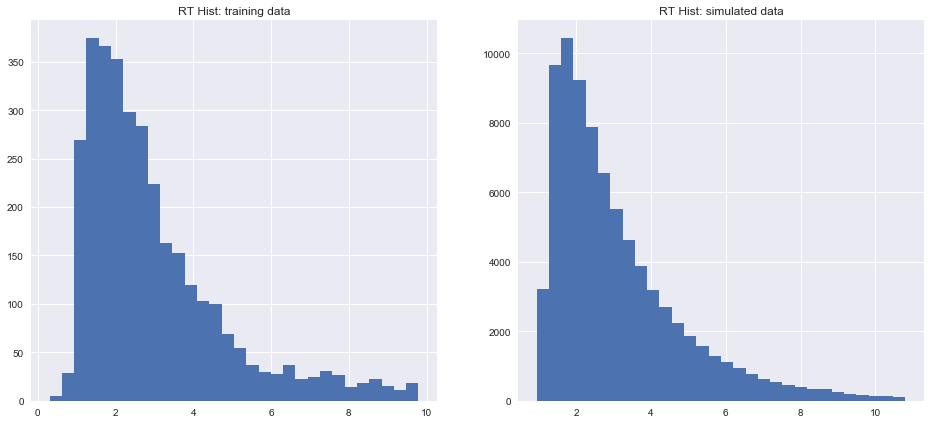

In [277]:
fig, ax = plt.subplots(1,2, figsize=(16, 7))
ax[0].hist(group_train[0].rt, bins = 30)
ax[0].set_title("RT Hist: training data")
ax[1].hist(sims_dict[best_group_fit].rt, bins = 30)
ax[1].set_title("RT Hist: simulated data")


print('Comparison of RTs')

#### RT vs Net Value

Training and Sim Data

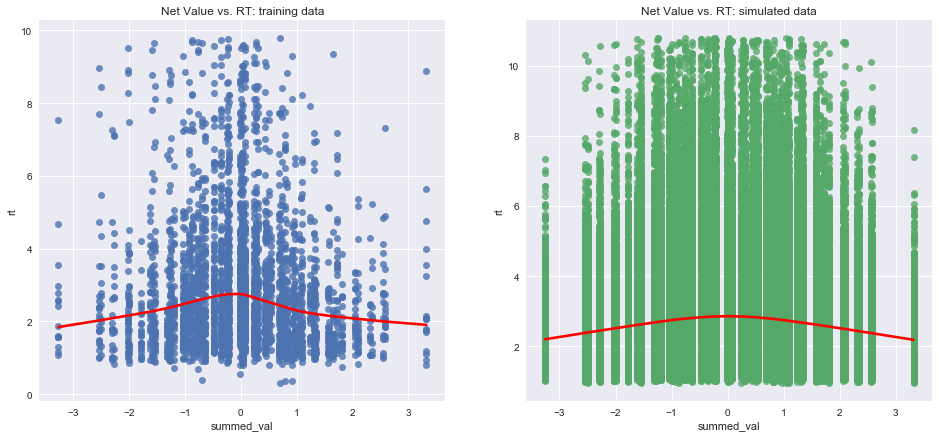

In [278]:
x1 = group_train[0].summed_val
y1 = group_train[0].rt

x2 = sims_dict[best_group_fit].summed_val
y2 = sims_dict[best_group_fit].rt

# Two subplots
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 7))
sns.regplot(x1, y1, lowess=True, line_kws={'color':'red'}, ax=ax1)
ax1.set_title('Net Value vs. RT: training data')
sns.regplot(x2, y2, lowess=True, line_kws={'color':'red'}, ax=ax2)
ax2.set_title('Net Value vs. RT: simulated data')


#### Quantize Data

In [114]:
# Training Data
df_train = group_train[0]
# Best Parameters Based on Training Data
df_sim = sims_dict[best_group_fit]


### Test Fit on Training Data

In [ ]:
# Create the variables (summed value) that we are using for our quantiles
x1 = df_train.summed_val
x2 = df_sim.summed_val

# Define quantiles - bins are [a, b) 
bins = np.array([-4, -0.9, -0.25, 0.25, 0.9, 4])

# Create column which indicates quantile of row
df_train['quantile'] = np.digitize(x1, bins)
df_sim['quantile'] = np.digitize(x2, bins)


In [116]:
# recode -1 response (reject) as 0 for probability of acceptance calculation
df_train.resp[df_train.resp == -1.] = 0
df_sim.resp[df_sim.resp == -1.] = 0


/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [117]:
train_rt_stats = pd.DataFrame(df_train.groupby(['parcode', 'quantile']).rt.agg(['mean', 'median', 'std', 'sem']))
train_choice_stats = pd.DataFrame(df_train.groupby(['parcode', 'quantile']).resp.agg(['mean', 'median', 'std', 'sem']))

sim_rt_stats = pd.DataFrame(df_sim.groupby(['parcode', 'quantile']).rt.agg(['mean', 'median', 'std', 'sem']))
sim_choice_stats = pd.DataFrame(df_sim.groupby(['parcode', 'quantile']).resp.agg(['mean', 'median', 'std', 'sem']))


train_rt_stats.rename(index=str, columns={"mean": "rt_mean", "median": "rt_median", "std": "rt_std", "sem": "rt_sem"}, inplace=True)
train_choice_stats.rename(index=str, columns={"mean": "choice_mean", "median": "choice_median", "std": "choice_std", "sem": "choice_sem"}, inplace=True)

sim_rt_stats.rename(index=str, columns={"mean": "rt_mean", "median": "rt_median", "std": "rt_std", "sem": "rt_sem"}, inplace=True)
sim_choice_stats.rename(index=str, columns={"mean": "choice_mean", "median": "choice_median", "std": "choice_std", "sem": "choice_sem"}, inplace=True)

# add fixation stats

KeyError: 'parcode'

In [118]:
# merge rt and choice stats
train_quantized_subj_stats = pd.concat([train_rt_stats, train_choice_stats], axis = 1)
sim_quantized_subj_stats = pd.concat([sim_rt_stats, sim_choice_stats], axis = 1)

train_quantized_subj_stats.head()


NameError: name 'sim_rt_stats' is not defined

In [93]:
df_train['rt_mean'] = x['mean']


In [94]:
df_train.head()


,parcode,trial,rt,resp,act_face_val,act_house_val,val_face,val_house,summed_val,0.01_0.05_0.1,...,0.093_0.164_0.55,0.093_0.164_0.775,0.093_0.164_1.0,0.093_0.221_0.1,0.093_0.221_0.325,0.093_0.221_0.55,0.093_0.221_0.775,0.093_0.221_1.0,quantile,rt_mean
0,1,1,8.883308,1,1.32,1.72,1.63,1.69,3.32,2.220446e-16,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,5,3.125534
2,1,3,3.716686,1,0.96,-0.68,0.89,-0.66,0.23,2.220446e-16,...,1.321138e-02,6.085193e-03,1.009082e-02,8.771930e-03,8.869180e-03,1.117318e-02,1.441242e-02,1.559020e-02,3,3.791645
4,1,5,2.966837,1,-0.24,0.28,-0.37,0.42,0.05,2.220446e-16,...,9.164969e-03,1.630989e-02,6.191950e-03,1.484018e-02,9.195402e-03,6.756757e-03,1.133787e-02,8.073818e-03,3,2.419415
6,1,7,2.217045,1,0.42,0.36,0.41,0.42,0.83,2.220446e-16,...,2.816901e-02,2.908726e-02,3.313253e-02,1.503759e-02,2.631579e-02,2.376033e-02,2.860061e-02,3.134479e-02,4,4.788649
8,1,10,2.333577,1,0.22,-0.38,0.03,-0.39,-0.36,2.220446e-16,...,9.137056e-03,1.518219e-02,9.100101e-03,8.009153e-03,4.494382e-03,3.303965e-03,1.088139e-03,6.535948e-03,2,4.129087


In [54]:
# SD measure of variability of data
# SEM measure of precision of data

df_train['rt_mean'] = df_train.groupby(['parcode', 'quantile']).rt.mean()
df_train['rt_median'] = df_train.groupby(['parcode', 'quantile']).rt.median()
df_train['rt_sd'] = df_train.groupby(['parcode', 'quantile']).rt.std()
df_train['rt_sem'] = df_train.groupby(['parcode', 'quantile']).rt.sem() 
 
df_train.head()


TypeError: incompatible index of inserted column with frame index

### RT comparison

Calculate means for quantiles

In [129]:
group_train_rt_bin_means = [group_train[0].rt[group_train[0]['quantile'] == i].mean() for i in range(1, len(bins))]
sim_params_rt_bin_means = [sims_dict[267].rt[sims_dict[267]['quantile'] == i].mean() for i in range(1, len(bins))]

group_train_rt_sem_bin_means = [stats.sem(group_train[0].rt[group_train[0]['quantile'] == i]) for i in range(1, len(bins))]
sim_params_rt_sem_bin_means = [stats.sem(sims_dict[267].rt[sims_dict[267]['quantile'] == i]) for i in range(1, len(bins))]

RT comparisons


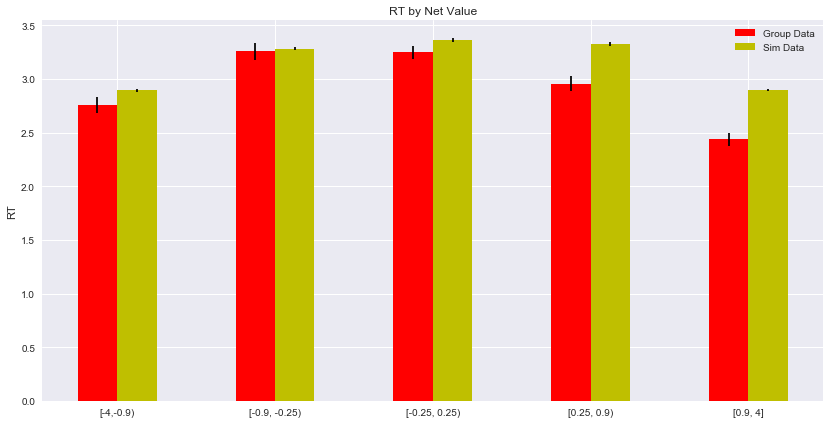

In [130]:
N = 5               # Number of quantiles 

ind = np.arange(N)  # the x locations for the groups
width = 0.25        # the width of the bars

# Plot group data
fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(ind, group_train_rt_bin_means, width, color='r', yerr=group_train_rt_sem_bin_means)

# Plot sim data
rects2 = ax.bar(ind + width, sim_params_rt_bin_means, width, color='y', yerr=sim_params_rt_sem_bin_means)

# add some text for labels, title and axes ticks
ax.set_ylabel('RT')
ax.set_title('RT by Net Value')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('[-4,-0.9)', '[-0.9, -0.25)', '[-0.25, 0.25)', '[0.25, 0.9)', '[0.9, 4]'))

ax.legend((rects1[0], rects2[0]), ('Group Data', 'Sim Data'))

print('RT comparisons')


### Choice Comparison

In [122]:
group_train_choice_bin_means = [group_train[0].resp[group_train[0]['quantile'] == i].mean() for i in range(1, len(bins))]
sim_params_choice_bin_means = [sims_dict[267].resp[sims_dict[267]['quantile'] == i].mean() for i in range(1, len(bins))]

group_train_choice_sem_bin_means = [stats.sem(group_train[0].resp[group_train[0]['quantile'] == i]) for i in range(1, len(bins))]
sim_params_choice_sem_bin_means = [stats.sem(sims_dict[267].resp[sims_dict[267]['quantile'] == i]) for i in range(1, len(bins))]

In [123]:
group_train_choice_sem_bin_means


[0.0089513283380584802,
 0.01633099438974411,
 0.016268948090273093,
 0.014222407684218284,
 0.0089412640531221117]

P(accept) comparisons


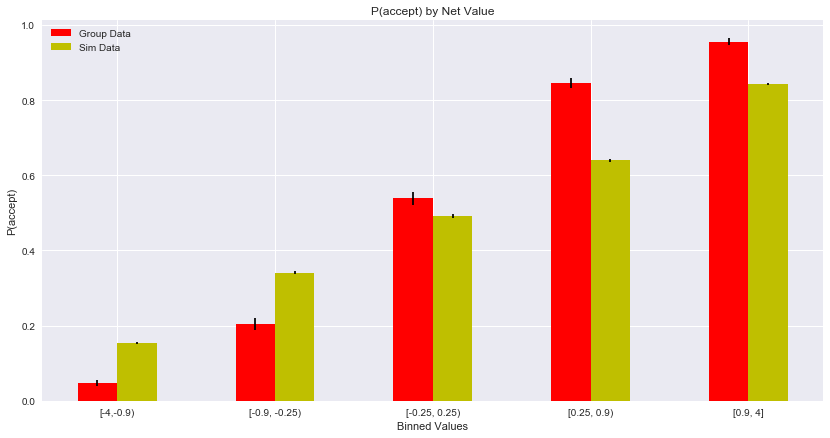

In [127]:
N = 5               # Number of quantiles 

ind = np.arange(N)  # the x locations for the groups
width = 0.25        # the width of the bars

# Plot group data
fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(ind, group_train_choice_bin_means, width, color='r', yerr=group_train_choice_sem_bin_means)

# Plot sim data
rects2 = ax.bar(ind + width, sim_params_choice_bin_means, width, color='y', yerr=sim_params_choice_sem_bin_means)

# add some text for labels, title and axes ticks
ax.set_ylabel('P(accept)')
ax.set_title('P(accept) by Net Value')
ax.set_xlabel('Binned Values')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('[-4,-0.9)', '[-0.9, -0.25)', '[-0.25, 0.25)', '[0.25, 0.9)', '[0.9, 4]'))

ax.legend((rects1[0], rects2[0]), ('Group Data', 'Sim Data'))

print('P(accept) comparisons')


## Subject

CONVERT from dict into single dataframe

In [ ]:
for subject in individual_test_sims.keys():
    if subject == 0:
        subjects = pd.DataFrame.from_dict(individual_test_sims[subject])
    else:
        x = pd.DataFrame.from_dict(individual_test_sims[subject])
        subjects = pd.concat([subjects, x])
        

In [179]:
subjects.head()


,parcode,trial,rt,resp,act_face_val,act_house_val,val_face,val_house,summed_val,first_fix,subject,est_scaling,est_boundary,est_theta,sim_rt,sim_resp,sim_drift_left,sim_drift_right,quantile
0,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,2.760,1.0,0.20267,0.206437,7
1,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,1.705,1.0,0.20267,0.206437,7
2,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,1.252,1.0,0.20267,0.206437,7
3,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,1.414,1.0,0.20267,0.206437,7
4,1,1,8.883308,1.0,1.32,1.72,1.63,1.69,3.32,1,0,0.093,0.221,0.325,1.395,1.0,0.20267,0.206437,7


In [399]:
# save subjects and test_data and subj_params_df
output_filepath = 'outputs/2017-11-30/test/'

pickle_out = open(output_filepath + "sim_subjects.pickle","wb")
pickle.dump(subjects, pickle_out)
pickle_out.close()

pickle_out = open(output_filepath + "test_data.pickle","wb")
pickle.dump(test_data, pickle_out)
pickle_out.close()

pickle_out = open(output_filepath + "subj_params_df.pickle","wb")
pickle.dump(subj_params_df, pickle_out)
pickle_out.close()


In [6]:
# load files for plotting
path_to_file = "outputs/2017-11-30/test/sim_subjects.pickle"
subjects = utils_addm.pickle_read(path_to_file)

path_to_file = "outputs/2017-11-30/test/test_data.pickle"
test_expdata = utils_addm.pickle_read(path_to_file)

path_to_file = "outputs/2017-11-30/test/subj_params_df.pickle"
subj_params_df = utils_addm.pickle_read(path_to_file)


In [8]:
test_data = test_expdata
# Create the variables (summed value) that we are using for our quantiles
x = subjects.summed_val
x1 = test_data.summed_val

# Define quantiles - bins are [a, b) 
bins = np.array([-4, -1., -0.5, -0.15, 0.15, 0.5, 1., 4])

# Create column which indicates quantile of row
subjects['quantile'] = np.digitize(x, bins)
test_data['quantile'] = np.digitize(x1, bins)
# recode -1 response (reject) as 0 for probability of acceptance calculation
subjects.resp[subjects.resp == -1.] = 0
subjects.sim_resp[subjects.sim_resp == -1.] = 0
test_data.resp[test_data.resp == -1.] = 0


/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
test_rt_stats = pd.DataFrame(test_data.groupby(['subject', 'quantile']).rt.agg(['mean', 'median', 'std', 'sem']))
test_choice_stats = pd.DataFrame(test_data.groupby(['subject', 'quantile']).resp.agg(['mean', 'std', 'sem']))

sim_rt_stats = pd.DataFrame(subjects.groupby(['subject', 'quantile']).sim_rt.agg(['mean', 'median', 'std', 'sem']))
sim_choice_stats = pd.DataFrame(subjects.groupby(['subject', 'quantile']).sim_resp.agg(['mean', 'std', 'sem']))

summed_val_sim = pd.DataFrame(subjects.groupby(['subject', 'quantile']).summed_val.agg(['mean']))
summed_val_test = pd.DataFrame(test_data.groupby(['subject', 'quantile']).summed_val.agg(['mean']))


In [10]:
test_rt_stats.rename(index=str, columns={"mean": "test_rt_mean", "median": "test_rt_median", "std": "test_rt_std", "sem": "test_rt_sem"}, inplace=True)
test_choice_stats.rename(index=str, columns={"mean": "test_choice_mean", "median": "test_choice_median", "std": "test_choice_std", "sem": "test_choice_sem"}, inplace=True)

sim_rt_stats.rename(index=str, columns={"mean": "sim_rt_mean", "median": "sim_rt_median", "std": "sim_rt_std", "sem": "sim_rt_sem"}, inplace=True)
sim_choice_stats.rename(index=str, columns={"mean": "sim_choice_mean", "median": "sim_choice_median", "std": "sim_choice_std", "sem": "sim_choice_sem"}, inplace=True)

summed_val_test.rename(index=str, columns={"mean": "summed_val_mean"}, inplace=True)
summed_val_sim.rename(index=str, columns={"mean": "summed_val_mean"}, inplace=True)

In [11]:
# merge rt and choice stats
test_quantized_subj_stats = pd.concat([test_rt_stats, test_choice_stats, summed_val_test], axis = 1)
sim_quantized_subj_stats = pd.concat([sim_rt_stats, sim_choice_stats, summed_val_test], axis = 1)


LIST SUBJECTS

In [12]:
np.unique(subjects.subject)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=uint8)

In [33]:
subject = str(7)

# RTs
# Test
test_rt_means = test_quantized_subj_stats.loc[subject, 'test_rt_mean']
test_rt_sems = test_quantized_subj_stats.loc[subject, 'test_rt_sem']
# Sim
sim_rt_means = sim_quantized_subj_stats.loc[subject, 'sim_rt_mean']
sim_rt_sems = sim_quantized_subj_stats.loc[subject, 'sim_rt_sem']

# Choices
# Test
test_choice_means = test_quantized_subj_stats.loc[subject, 'test_choice_mean']
test_choice_sems = test_quantized_subj_stats.loc[subject, 'test_choice_sem']
# Sim
sim_choice_means = sim_quantized_subj_stats.loc[subject, 'sim_choice_mean']
sim_choice_sems = sim_quantized_subj_stats.loc[subject, 'sim_choice_sem']


In [34]:
v = str(round(np.mean(test_data.est_scaling[test_data.subject == int(subject)]), 3))
a = str(round(np.mean(test_data.est_boundary[test_data.subject == int(subject)]), 3))
t = str(round(np.mean(test_data.est_theta[test_data.subject == int(subject)]), 3))
mle = subj_params_df.loc[int(subject), 'MLE']


In [35]:
title_size = 16
label_size = 14
legend_size = 12


RT comparisons


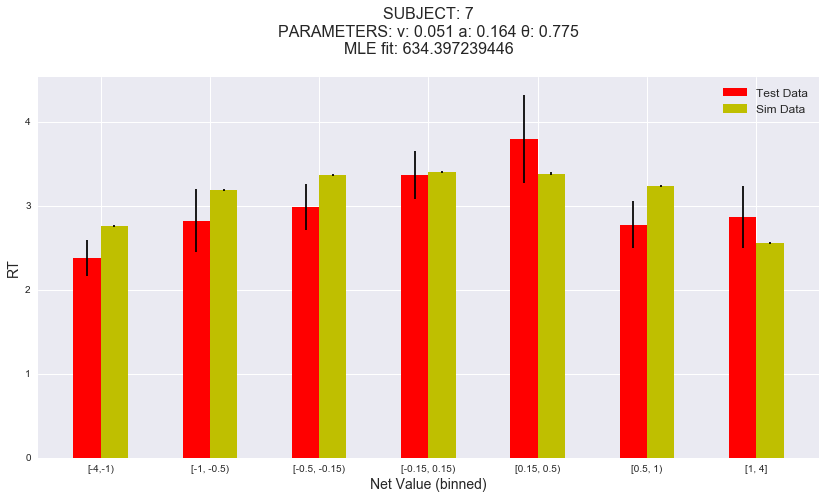

In [36]:
N = 7               # Number of quantiles 

ind = np.arange(N)  # the x locations for the groups
width = 0.25         # the width of the bars

# Plot test data
fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(ind, test_rt_means, width, color='r', yerr=test_rt_sems)

# Plot sim data
rects2 = ax.bar(ind + width, sim_rt_means, width, color='y', yerr=sim_rt_sems)

# add some text for labels, title and axes ticks
ax.set_ylabel('RT', fontsize=label_size)
ax.set_xlabel('Net Value (binned)', fontsize=label_size)
ax.set_title('SUBJECT: ' + subject +
             '\nPARAMETERS: v: ' + str(v) +
             ' a: ' + str(a) +
             ' θ: ' + str(t) +
             '\nMLE fit: ' + str(mle) + '\n',
             fontsize=title_size
            )
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('[-4,-1)', '[-1, -0.5)', '[-0.5, -0.15)', '[-0.15, 0.15)', '[0.15, 0.5)', '[0.5, 1)', '[1, 4]'))

ax.legend((rects1[0], rects2[0]), ('Test Data', 'Sim Data'), fontsize = legend_size)

print('RT comparisons')


p(accept) comparisons


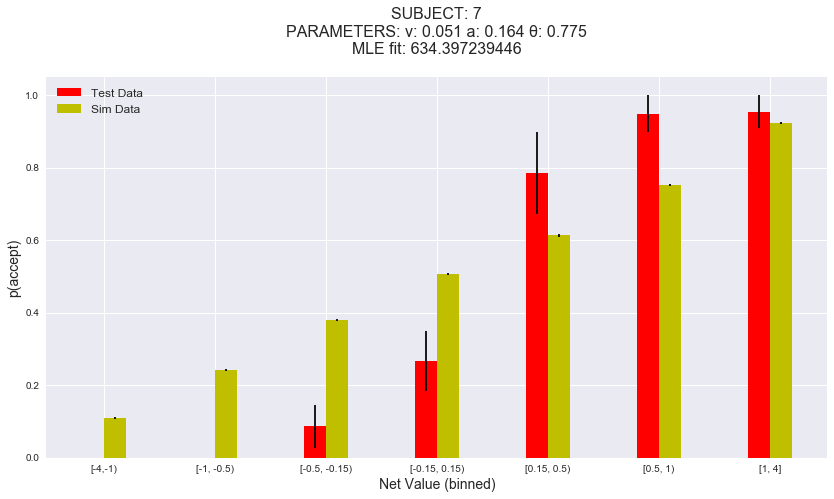

In [37]:
N = 7               # Number of quantiles 

ind = np.arange(N)  # the x locations for the groups
width = 0.2         # the width of the bars

# Plot test data
fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(ind, test_choice_means, width, color='r', yerr=test_choice_sems)

# Plot sim data
rects2 = ax.bar(ind + width, sim_choice_means, width, color='y', yerr=sim_choice_sems)

# add some text for labels, title and axes ticks
ax.set_ylabel('p(accept)', fontsize=label_size)
ax.set_xlabel('Net Value (binned)', fontsize=label_size)
ax.set_title('SUBJECT: ' + subject +
             '\nPARAMETERS: v: ' + str(v) +
             ' a: ' + str(a) +
             ' θ: ' + str(t) +
             '\nMLE fit: ' + str(mle) + '\n',
             fontsize=title_size
            )
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('[-4,-1)', '[-1, -0.5)', '[-0.5, -0.15)', '[-0.15, 0.15)', '[0.15, 0.5)', '[0.5, 1)', '[1, 4]'))

ax.legend((rects1[0], rects2[0]), ('Test Data', 'Sim Data'), fontsize=legend_size)

print('p(accept) comparisons')
